# Selecting Best Suitable Activation Function 
<font size="5">Submitted By : <a href="https://www.linkedin.com/in/jay-shembekar-13b223146" >Jay Shembekar </a></font>

In [1]:
import numpy as np
import pandas as pd

# reading file, Dataset used - Bank Note Authentication
df = pd.read_csv('BankNote_Authentication.csv') 
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
# Creating X and y for independent and dependent features

X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [3]:
# Splitting dataset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [5]:
X_train

array([[0.41049142, 0.8566794 , 0.30278071, 0.26001485],
       [0.21781793, 0.62477783, 0.26520602, 0.69678059],
       [0.45086951, 0.2196657 , 0.51981821, 0.79406437],
       ...,
       [0.56173284, 0.55276766, 0.1324014 , 0.77018593],
       [0.66580916, 0.50592299, 0.45046202, 0.8658303 ],
       [0.36501683, 0.92032464, 0.34161156, 0.28806621]])

In [6]:
# Importing the Keras libraries and packages
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout, LeakyReLU, PReLU, ELU
from keras.activations import relu, sigmoid

## Using different Activation Functions for hidden layer
    1. relu
    2. sigmoid
    3. softmax
    4. softplus
    5. softsign
    6. tanh
    7. selu
    8. exponential

In [7]:
model1 = Sequential()
model1.add(Dense(units = 3, activation = 'relu', input_dim = 4)) 
model1.add(Dense(units = 1, activation = 'sigmoid'))
model1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
model2 = Sequential()
model2.add(Dense(units = 3, activation = 'sigmoid', input_dim = 4)) 
model2.add(Dense(units = 1, activation = 'sigmoid'))
model2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model3 = Sequential()
model3.add(Dense(units = 3, activation = 'softmax', input_dim = 4)) 
model3.add(Dense(units = 1, activation = 'sigmoid'))
model3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model4 = Sequential()
model4.add(Dense(units = 3, activation = 'softplus', input_dim = 4)) 
model4.add(Dense(units = 1, activation = 'sigmoid'))
model4.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
model5 = Sequential()
model5.add(Dense(units = 3, activation = 'softsign', input_dim = 4)) 
model5.add(Dense(units = 1, activation = 'sigmoid'))
model5.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model6 = Sequential()
model6.add(Dense(units = 3, activation = 'tanh', input_dim = 4)) 
model6.add(Dense(units = 1, activation = 'sigmoid'))
model6.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
model7 = Sequential()
model7.add(Dense(units = 3, activation = 'selu', input_dim = 4)) 
model7.add(Dense(units = 1, activation = 'sigmoid'))
model7.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
model8 = Sequential()
model8.add(Dense(units = 3, activation = 'exponential', input_dim = 4)) 
model8.add(Dense(units = 1, activation = 'sigmoid'))
model8.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
models = [('relu', model1),
          ('sigmoid', model2),
          ('softmax', model3),
          ('softplus', model4),
          ('softsign', model5),
          ('tanh', model6),
          ('selu', model7),
          ('exponential', model8)]

In [16]:
from sklearn.metrics import accuracy_score

# Creating a loop which will take the max Validation Accuracy score out of all Activation Functions

names = []
results = []
for name, model in models:
    history = model.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)
    results.append(max(history.history['val_accuracy']))
    names.append(name) 
    msg = (names, results)
    print(msg)

Epoch 1/100
65/65 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.5941 - val_loss: 0.6757 - val_accuracy: 0.5521
Epoch 2/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.6112 - val_loss: 0.6687 - val_accuracy: 0.5804
Epoch 3/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.6128 - val_loss: 0.6638 - val_accuracy: 0.5804
Epoch 4/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6267 - val_loss: 0.6579 - val_accuracy: 0.5962
Epoch 5/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6330 - val_loss: 0.6538 - val_accuracy: 0.5962
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.6330 - val_loss: 0.6487 - val_accuracy: 0.5994
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 0.6255 - accuracy: 0.6330 - val_loss: 0.6446 - val_accuracy: 0.5994
Epoch 8/100
6

In [17]:
msg

(['relu',
  'sigmoid',
  'softmax',
  'softplus',
  'softsign',
  'tanh',
  'selu',
  'exponential'],
 [0.9621450901031494,
  0.85173499584198,
  0.9274448156356812,
  0.9495267868041992,
  0.9716088175773621,
  0.9684542417526245,
  0.9684542417526245,
  1.0])

In [18]:
# DataFrame of performance of each activation function

frame = pd.DataFrame(msg).T
frame.columns = ['Activation Function', 'Val_Accuracy']
frame

,Activation Function,Val_Accuracy
0,relu,0.962145
1,sigmoid,0.851735
2,softmax,0.927445
3,softplus,0.949527
4,softsign,0.971609
5,tanh,0.968454
6,selu,0.968454
7,exponential,1.0


In [19]:
# To check which activation function is performing best

frame[frame.Val_Accuracy == frame.Val_Accuracy.max()]

,Activation Function,Val_Accuracy
7,exponential,1.0


## Plots to see the trend of Accuracy and Loss against number of epochs

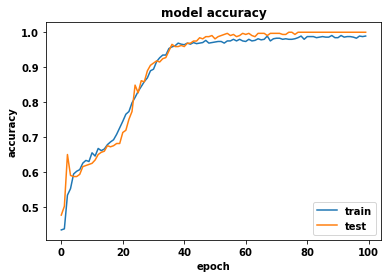

In [20]:
import matplotlib.pyplot as plt

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

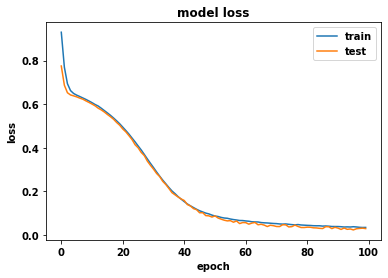

In [21]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

## Confusion Matrix and Accuracy Score

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
print('\n Accuracy Score:', accuracy_score(y_pred, y_test))

Confusion Matrix: 

 [[231   1]
 [  0 180]]

 Accuracy Score: 0.9975728155339806
